In [4]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'


In [5]:
%pip install split-folders
import splitfolders

%cd C:\Users\patwa\OneDrive\Desktop\BMEN MODOEL FOLDER
%pwd

splitfolders.ratio('COVID-19_Radiography_Dataset', output="dataset", seed=1337, ratio=(.8,0,0.2)) 


Copying files: 0 files [00:00, ? files/s]

Note: you may need to restart the kernel to use updated packages.
c:\Users\patwa\OneDrive\Desktop\BMEN MODOEL FOLDER


Copying files: 21165 files [01:06, 318.00 files/s]


In [5]:
import seaborn as sns
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import utils
from PIL import Image
import tensorflow
%matplotlib notebook
import numpy as np
import os
import time

X_train = []
y_train = []
X_test  = []
y_test  = []
tmp_x_train = []
tmp_y_train = []
tmp_x_test = []
tmp_y_test = []

imageCatMap = {
    "COVID": 0,
    "Lung_Opacity" : 1,
    "Normal" : 2,
    "Viral Pneumonia" : 3
}

#=====================================================================
cat = "COVID"
for imgName in os.listdir(r"dataset\train\{}".format(cat)):
    image   = Image.open(r"dataset\train\{}\{}".format(cat, imgName))
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_train.append(npArr)
    tmp_y_train.append(imageCatMap[cat])


#=====================================================================
cat = "COVID"
for imgName in os.listdir(r"dataset\test\{}".format(cat)):
    image   = Image.open(r"dataset\test\{}\{}".format(cat, imgName))
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_test.append(npArr)
    tmp_y_test.append(imageCatMap[cat])


#=====================================================================
cat = "Lung_Opacity"
for imgName in os.listdir(r"dataset\train\{}".format(cat)):
    image   = Image.open(r"dataset\train\{}\{}".format(cat, imgName))
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_train.append(npArr)
    tmp_y_train.append(imageCatMap[cat])


#=====================================================================
cat = "Lung_Opacity"
for imgName in os.listdir(r"dataset\test\{}".format(cat)):
    image   = Image.open(r"dataset\test\{}\{}".format(cat, imgName))
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_test.append(npArr)
    tmp_y_test.append(imageCatMap[cat])


#=====================================================================
cat = "Normal"
for imgName in os.listdir(r"dataset\train\{}".format(cat)):
    image   = Image.open(r"dataset\train\{}\{}".format(cat, imgName))
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_train.append(npArr)
    tmp_y_train.append(imageCatMap[cat])


# #=====================================================================
cat = "Normal"
for imgName in os.listdir(r"dataset\test\{}".format(cat)):
    image   = Image.open(r"dataset\test\{}\{}".format(cat, imgName))
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_test.append(npArr)
    tmp_y_test.append(imageCatMap[cat])


#=====================================================================
cat = "Viral Pneumonia"
for imgName in os.listdir(r"dataset\train\{}".format(cat)):
    image   = Image.open(r"dataset\train\{}\{}".format(cat, imgName))
    image = image.convert("1")
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_train.append(npArr)
    tmp_y_train.append(imageCatMap[cat])


# #=====================================================================
cat = "Viral Pneumonia"
for imgName in os.listdir(r"dataset\test\{}".format(cat)):
    image   = Image.open(r"dataset\test\{}\{}".format(cat, imgName))
    image = image.convert("1")
    npArr   = np.asarray(image,dtype="float16")
    npArr = np.divide(npArr,255)
    tmp_x_test.append(npArr)
    tmp_y_test.append(imageCatMap[cat])


y_train = np.array(tmp_y_train)
X_train = np.array(tmp_x_train)

y_test = np.array(tmp_y_test)
X_test = np.array(tmp_x_test)

print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

y_train_org = y_train
y_test_org = y_test



Train: X=(16930, 299, 299), y=(16930,)
Test: X=(4235, 299, 299), y=(4235,)


Train: X=(16930, 299, 299), y=(16930,)
Test: X=(4235, 299, 299), y=(4235,)


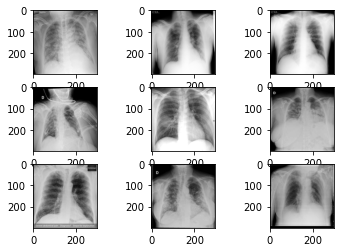

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot first few images
for i in range(9):

    img_float64 = X_train[i].astype("float64")

    # define subplot
    plt.subplot(330 + 1 + i)

    # plot raw pixel data
    plt.imshow(img_float64, cmap=plt.get_cmap('gray'))
    
# show the figure
plt.show()

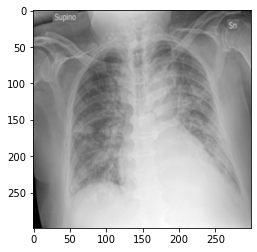

class label of lol image :  2
class label of first image :  0
Now converted to the class lol :  [0. 0. 1. 0.]
Now converted to the class :  [1. 0. 0. 0.]


In [10]:

from tensorflow.keras.utils import to_categorical

# from keras.utils import np_utils
plt.figure()
plt.imshow(X_train[0].astype("float64"), cmap=plt.get_cmap('gray'))
plt.show()

print( "class label of lol image : ", y_train_org[15000] )
print( "class label of first image : ", y_train_org[0] )

y_train = to_categorical(y_train_org, 4)
y_test = to_categorical(y_test_org, 4)

print( "Now converted to the class lol : ", y_train[15000] )
print( "Now converted to the class : ", y_train[0] )


In [11]:
X_train = X_train.reshape(X_train.shape[0], 89401)
X_test = X_test.reshape(X_test.shape[0], 89401) 
               
print("Number of training examples: ", X_train.shape[0],
     "and the image is of the shape (%d)"%(X_train.shape[1]))


Number of training examples:  16930 and the image is of the shape (89401)


In [15]:
# from keras.layers import Activation, Dense
# from keras.models import Sequential 
import tensorflow as tf
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.models import Sequential 

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(Activation('relu'))
model.add(Dense(4))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                2860864   
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 132       
_________________________________________________________________
activation_3 (Activation)    (None, 4)                 0         
Total params: 2,860,996
Trainable params: 2,860,996
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='sgd', loss='categorical_crossentropy',
             metrics=['accuracy'])

In [25]:
epochs = 200 #Input
training = model.fit(X_train, y_train, batch_size=32, epochs=epochs,
                    verbose=0, validation_data=(X_test,y_test))

In [26]:
performance = model.evaluate(X_test, y_test, verbose=0)

print("test score", performance[0]) 
print("test accuracy", performance[1])


test score 1.910468339920044
test accuracy 0.5459268093109131


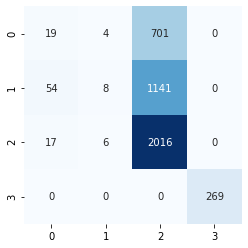

In [27]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
y_pred = model.predict(X_test)
y_pred_c = np.argmax(y_pred, axis=1)
y_test_c = np.argmax(y_test, axis=1)
matrix_confusion = confusion_matrix(y_test_c, y_pred_c)

sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
plt.show()


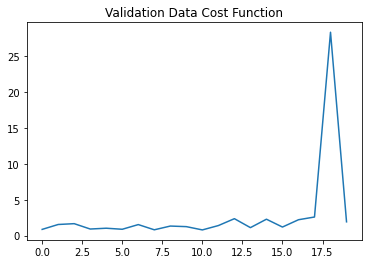

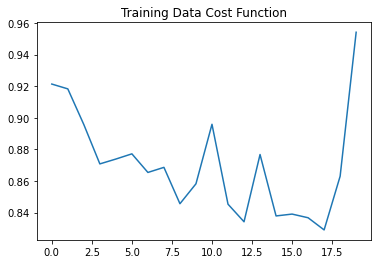

In [32]:
x = list(range(epochs))
#Tesing Data = Vaildation Data, lower is better
vy = training.history['val_loss']
#Training Data, lower is better
ty = training.history['loss']

plt.plot( x, vy )
plt.title('Validation Data Cost Function')
plt.show()
plt.plot( x, ty )
plt.title('Training Data Cost Function')
plt.show()

